In [1]:
# pip3 install matplotlib
# Documentació: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib

És la llibreria més utilitzada en l'àmbit de la ciència de dades per fer gràfics.

# Creating and customizing our first plots

Font: [Youtube][Matplotlib Tutorial][Corey Schafer]

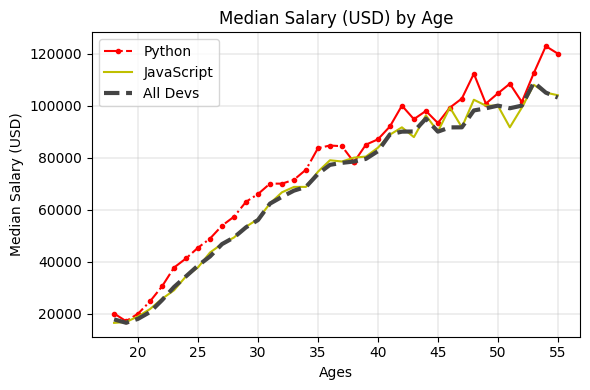

In [15]:
plt.figure(figsize=(6,4), dpi=100)

# Estils predefinits
#print(plt.style.available)
#plt.style.use("seaborn")
#plt.xkcd() # Estil especial perquè sembli dibuixat a mà

# Dades eix x
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# Dades eix y - Sou mitjà programador Python a EEUU
py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666, 84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]

#plt.plot(ages_x, py_dev_y, color="r", marker=".", label='Python')

# Diferenciar dues parts del mateix gràfic
plt.plot(ages_x[:21], py_dev_y[:21], color="r", marker=".", linestyle="-.", label='Python')
plt.plot(ages_x[20:], py_dev_y[20:], color="r", marker=".")


# Dades eix y - Sou mitjà programador JavaScript a EEUU
js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000, 78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
plt.plot(ages_x, js_dev_y, color="y", label='JavaScript')

# Dades eix y - Sou mitjà programador a EEUU
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232, 78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]
plt.plot(ages_x, dev_y, color='#444444', linestyle='--', linewidth=3, label='All Devs')

# plt.xticks(list(range(18,60,2))) Per forçar inici-fi-freq de l'eix x, (yticks per y)

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend(fontsize=10) # Llegenda

plt.grid(True, linewidth=0.3)

plt.tight_layout() # No superposar títols

#plt.savefig("first_graph.png", dpi=300) # Guardar la imatge

plt.show()

# Filling area on line plots

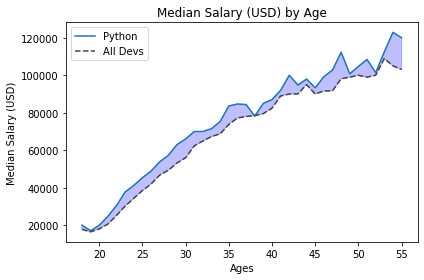

In [25]:
plt.plot(ages_x, py_dev_y, label='Python')

plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

# Omplir l'àrea per sota la línea de Python

#plt.fill_between(ages_x, py_dev_y, alpha=0.25) # alpha: transperència. 

# Per defecte omple des de la línea fins a y=0. Podem canviar-ho. Per exemple, pintar per sota o per sobre de la mediana general
salaries = py_dev_y + js_dev_y + dev_y
salaries_arr = np.array(salaries)
salary_median = np.median(salaries_arr)

#plt.fill_between(ages_x, py_dev_y, salary_median, alpha=0.25)


# Si volem pintar només on es compleixi una condició usem argument "where"

#plt.fill_between(ages_x, py_dev_y, salary_median,
#                where=(py_dev_y <= salary_median), interpolate=True, color="red", alpha=0.25, label="Below median")

#plt.fill_between(ages_x, py_dev_y, salary_median,
#                where=(py_dev_y > salary_median), interpolate=True, color="blue", alpha=0.25, label="Above median")


# Si volem pintar entre dues línies del gràfic. 

#plt.fill_between(ages_x, py_dev_y, dev_y, color="red", alpha=0.25)

# Cal que les dades de l'eix y siguin Series per poder comparar en un "where" element a element. Si són llistes, dóna error. So haguéssim llegit d'un csv, i agaféssim les columnes com a data, ja serien Series.

py_salaries = pd.Series(py_dev_y)
dev_salaries = pd.Series(dev_y)

plt.fill_between(ages_x, py_salaries, dev_salaries,
                where=(py_salaries <= dev_salaries), interpolate=True, color="red", alpha=0.25)

plt.fill_between(ages_x, py_salaries, dev_salaries,
                where=(py_salaries > dev_salaries), interpolate=True, color="blue", alpha=0.25)


plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend() # Llegenda

plt.tight_layout()

plt.show()

# Bar charts

Únics canvis respecte plot:

- plt.plot passa a ser plt.bar

- No té sentit argument "marker"

El problema es presenta quan volem graficar més d'una variable, és a dir, més d'una barra en un mateix índex x. Per defecte, les superposa. En l'exemple, seria quan volem graficar no només els sous de Python, sinó a la vegada els de JavaScript i Generals. Aleshores cal:

- canviar els valors de l'índex x i resetejar-los a 0,1,2,3... fent un array amb un arange de la llargada de la variable que contenia els valors de l'eix x.

- fer-ho servir per modificar l'amplada de les barres de manera que hi capiguin totes de costat. Ho farem sumant i restant una variable bar_width.

- Per tal que en el gràfic l'eix x es vegi amb els valors que toquen i no 0,1,2,3... cal usar plt.xticks(ticks=x_indexes, labels=ages_x)

ALTRES:

- plt.barh representa les barres en horitzontal.

- variable_eix_x.reverse i variable_eix_y.reverse farà que es mostri el gràfic en ordre invers.


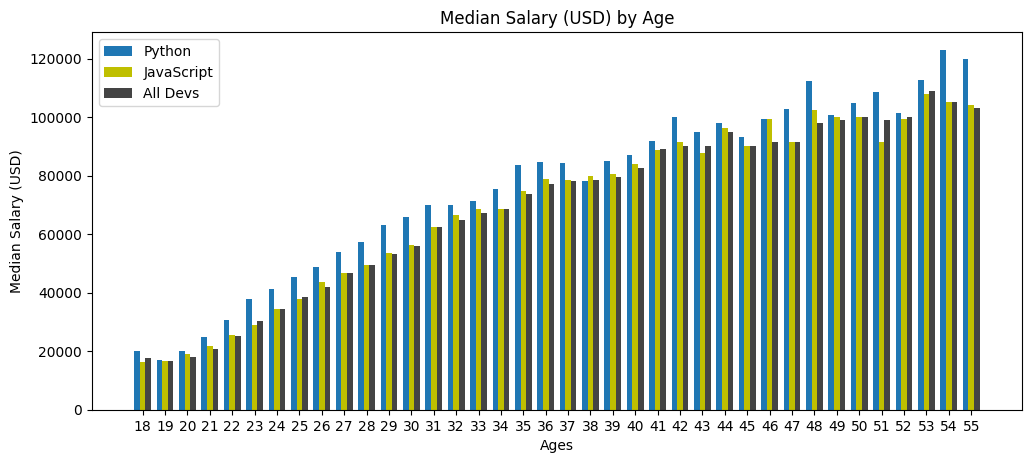

In [3]:
plt.figure(figsize=(12,5), dpi=100)

# Dades eix x
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

x_indexes = np.arange(len(ages_x))
bar_width = 0.25

# Dades eix y - Sou mitjà programador Python a EEUU
py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666, 84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]

plt.bar(x_indexes - bar_width, py_dev_y, width=bar_width, label='Python')

# Dades eix y - Sou mitjà programador JavaScript a EEUU
js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000, 78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
plt.bar(x_indexes, js_dev_y, width=bar_width, color="y", label='JavaScript')

# Dades eix y - Sou mitjà programador a EEUU
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232, 78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]
plt.bar(x_indexes + bar_width, dev_y, width=bar_width, color='#444444', label='All Devs')

plt.xticks(ticks=x_indexes, labels=ages_x)

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend(fontsize=10) # Llegenda

plt.show()

# Pie charts

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


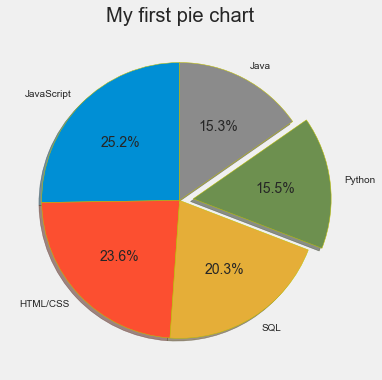

In [42]:
print(plt.style.available)
plt.style.use("fivethirtyeight")

# Interview: how many interviewed people knows that language
slices = [59219, 55466, 47544, 36443, 35917]
labels = ["JavaScript", "HTML/CSS", "SQL", "Python", "Java"]

# Si volem destacar un tros del pastís cap enfora
explode = [0, 0, 0, 0.1, 0] # Destaquem el 4t, Python, i cap enfora un 10% del radi

plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=90, autopct="%1.1f%%", wedgeprops={"edgecolor": "y"})


plt.title("My first pie chart")
plt.tight_layout()

plt.show()

# Stack plot

A stack plot is a plot that shows the whole data set with easy visualization of how each part makes up the whole. Each constituent of the stack plot is stacked on top of each other. It shows the part makeup of the unit, as well as the whole unit.

<function matplotlib.pyplot.show(close=None, block=None)>

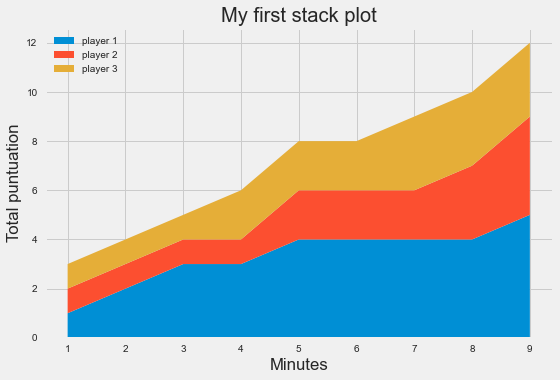

In [32]:
plt.style.use("fivethirtyeight")

# Dades sobre puntuació total d'un joc grupal en cada un dels minuts del joc, aportades per quants punts porta cada un dels jugadors.

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

labels = ["player 1", "player 2", "player 3"]
# En el minut 1, portaven un total de 3 punts aportats 1 per cada un, en el minut 4 portaven un total de 6 punts aportats com 3, 1 i 2, i el joc acaba amb 12 punts totals, aportats com 5, 4 i 3.

plt.stackplot(minutes, player1, player2, player3, labels=labels)

plt.xlabel("Minutes")
plt.ylabel("Total puntuation")
plt.title("My first stack plot")
plt.legend(loc="upper left")


plt.tight_layout()

plt.show()


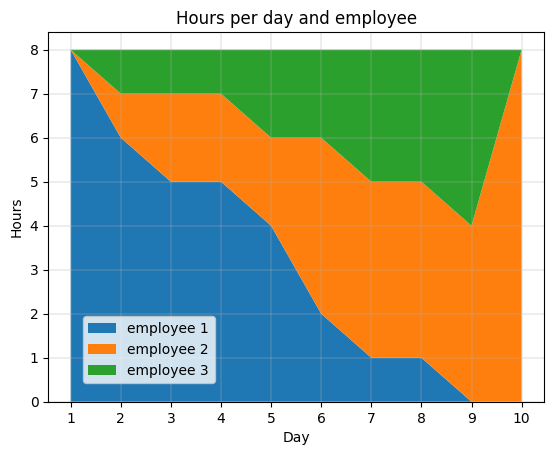

In [7]:
# De les 8h totals sque s'han de dedicar al projecte, cada treballador n'aporta durant 10 dies les següents:
plt.style.use('default')

plt.grid(visible=True, linewidth=0.3)

days = list(range(1, 11))

e1 = [8, 6, 5, 5, 4, 2, 1, 1, 0, 0]
e2 = [0, 1, 2, 2, 2, 4, 4, 4, 4, 8]
e3 = [0, 1, 1, 1, 2, 2, 3, 3, 4, 0]

labels = ["employee 1", "employee 2", "employee 3"]

plt.stackplot(days, e1, e2, e3, labels=labels)

plt.title("Hours per day and employee")
plt.xlabel("Day")
plt.xticks(list(range(1,11)))
plt.ylabel("Hours")
plt.legend(loc=(0.07, 0.05), facecolor="white")

plt.tight_layout
plt.show()


# Histogram

A histogram is a graph used to represent the frequency distribution of a few data points of one variable. Histograms often classify data into various “bins” or “range groups” and count how many data points belong to each of those bins.

29.0


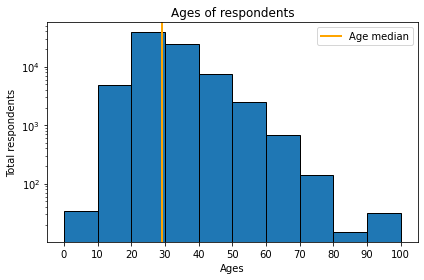

In [48]:
data = pd.read_csv("data_hist.csv")
#print(data.head())

ages = data["Age"]
#print(ages.head())

bins = list(range(0, 110, 10)) # Rangs de cada columna

# plt.hist(ages, bins=bins) # La freqüència d'alguns valors és molt alta i això no permet observar les freq d'alguns intervals. Usem aleshores escala logarítmica
plt.hist(ages, bins=bins, log=True, edgecolor="black")

median = np.median(ages) # Farem una línea vertical que marqui la mediana de les dades
print(median)
plt.axvline(median, color="orange", label="Age median", linewidth = 2)

plt.xticks(bins)
plt.xlabel("Ages")
plt.ylabel("Total respondents")
plt.title("Ages of respondents")
plt.legend()

plt.tight_layout()

plt.show()

# Scatter plots

A graph in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

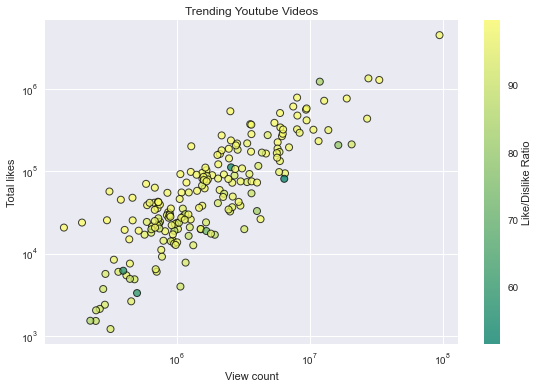

In [93]:
plt.style.use("seaborn")

data = pd.read_csv("data_youtube.csv")
#print(data.head())

views = data["view_count"]
likes = data["likes"]
ratio = data["ratio"]

#plt.scatter(views, likes) # Observem que hi ha un outlier que no ens permet veure bé la correlació.

# OPCIÓ 1
# Passem els eixos a escala logarítmica
plt.xscale("log")
plt.yscale("log")

# OPCIÓ 2
# # Detectem i eliminem outliers
# # IQR
# Q1 = np.percentile(views, 25, method="midpoint")
# Q3 = np.percentile(views, 75, method="midpoint")
# IQR = Q3 - Q1
# print(IQR)

# # Upper bound
# upper = np.where(views >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(views <= (Q1-1.5*IQR))
# print(upper) # Detecta 20 outliers
# print(lower)

# ''' Removing the Outliers '''
# views.drop(upper[0], inplace = True)
# views.drop(lower[0], inplace = True)
# likes.drop(upper[0], inplace = True)
# likes.drop(lower[0], inplace = True)
# ratio.drop(upper[0], inplace = True)
# ratio.drop(lower[0], inplace = True)
# print(len(views))

# Gràfic de correlació entre views i likes
# plt.scatter(views, likes, edgecolor="black", linewidth=1, alpha=0.75)

# Afegim la variable ratio com a color.

plt.scatter(views, likes, c=ratio, cmap="summer", edgecolor="black", linewidth=1, alpha=0.75)

cbar = plt.colorbar() # Llegenda del colors
cbar.set_label("Like/Dislike Ratio")

plt.xlabel("View count")
plt.ylabel("Total likes")
plt.title("Trending Youtube Videos")

plt.tight_layout()

plt.show()


# Plotting Time Series data

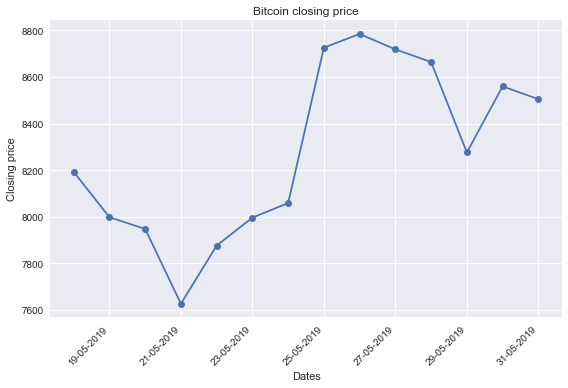

In [12]:
from matplotlib import dates as mpl_dates
plt.style.use("seaborn")

data = pd.read_csv("data_timeseries.csv")

data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d") # Convertim Serie a format datetime
data.sort_values(by="Date", inplace=True) # Ordenem el df per data

dates = data["Date"]
price_close = data["Close"]

plt.plot_date(dates, price_close, linestyle="solid") #linestyle perquè sinó només posa marcadors.

plt.xlabel("Dates")
plt.gcf().autofmt_xdate(rotation=45) #plt.gcf perquè no hem fet figura. Mètode per mostrar dates.

# Si volem mostrar la data en un altre ordre
date_format = mpl_dates.DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel("Closing price")
plt.title("Bitcoin closing price")

plt.tight_layout()

plt.show()

# Plotting live data in real-time

In [ ]:
# EXECUTAR AQUEST CODI EN L'ARXIU MATPLOT_REALTIME.PY

import random
from itertools import count
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

def animate(i): # Funció que va fent el gràfic cada vegada amb més valors en les llistes dels eixos
    data = pd.read_csv('data_realtime.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla() # Clear axis perquè el gràfic es mantingui amb el mateix color

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


anim = FuncAnimation(plt.gcf(), animate, interval=1000) # interval en milisegons, és a dir, actualitzem cada 1 segon.

plt.tight_layout()
plt.show()

# Subplots

72.0

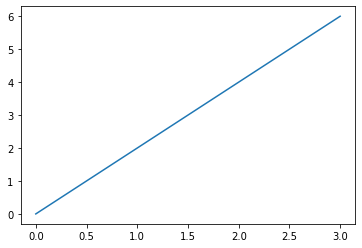

In [34]:
fig = plt.figure() # Crear una figura on poder representar, espai buit.

ax = fig.add_subplot() # Generem la variable del gràfic

x = [0, 1, 2, 3]
y = [0, 2, 4, 6]
ax.plot(x,y)

fig.get_figwidth() # 6 inches
fig.get_figheight() # 4 inches
fig.get_dpi() # 72 dpis
# La resolució ve donada per inch·dpi:  6 · 72 x 4 · 72 = 432x288
# Aquesta és la configuració per defecte en Jupyter Notebooks

In [4]:
# Especificar paràmetres concrets
fig2 = plt.figure(figsize=(19.2,10.8), dpi=300)

<Figure size 5760x3240 with 0 Axes>

In [4]:
# Per modificar la configuració de les figures per defecte

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 300

In [ ]:
# Crea la figura i la variable del gràfic a la vegada, en aquest cas, un sol gràfic
fig, ax = plt.subplots()

# fig, ax2 = plt.subplots() # Si volguessim fer un altre gràfic apart, però en el mateix arxiu python

## Graella

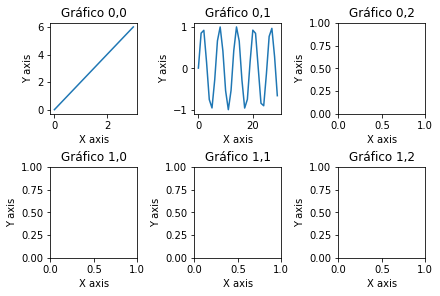

In [31]:
# Si volem varis gràfics en una mateixa figura, generem una graella

fig, axs = plt.subplots(2, 3, constrained_layout=True) # dos files, tres columnes. "layout" per no solapar-se els títols.

for i in range(0,2): 
    for j in range(0,3) :
        axs[i,j].set_title(f"Gráfico {i},{j}")
        axs[i,j].set_xlabel("X axis")
        axs[i,j].set_ylabel("Y axis")


x = [0, 1, 2, 3]
y = [0, 2, 4, 6]
x_sin = list(range(0, 30))

axs[0,0].plot(x, y)
axs[0,1].plot(x_sin, np.sin(x_sin))

# Opció en definir:  fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
# aleshores ax1.plot() ...